# **Jandy - Research Project Midway Checkpoint | CPSC 368**

Group members: Jaden Lai, Andy Hong

## Summary

This research project serves to analyze loneliness trends among Canadians from 2021 to 2023 during the COVID-19 pandemic period, for those 15 and over to compare the percentage of people experiencing different levels of loneliness (by gender and total population) with key health indicators, including anxiety disorders, mood disorders, occasional/daily smoking, and frequent cannabis use. The goal is to identify potential associations between loneliness and these health factors, providing insights into their interconnectedness.

## Research Questions for Investigation

After speaking with our project TA, we have decided to change our research question. 

Our old research goal was to “compare the habitual impact of the pandemic on vaping usage before 2020 (pre-pandemic) and after 2020 (post-pandemic)”, as well as to “compare the impact the COVID-19 pandemic had on drugs and substance abuse for youth and adults”

One of our new research questions is now: “How do levels of loneliness correlate with mental health outcomes—such as mood disorders and anxiety—between sex among persons aged 15 and over in Canada from 2021 to 2023?”
We will do this by:
Measuring percentage of loneliness for men/women/race/age (different sociodemographic characteristics) from 2021-2024 in Canada for those aged 15 and over through a Canadian government survey
Aggregating anxiety/mood disorders by year for male/female by age group
Association/correlation via ________


We also want to research : “Does the association between alcohol usage, substance abuse and loneliness levels differ between Male and Females?



We changed our research questions because we found no clear relationship between vaping habitual impact and rate of hospitalization due to substance abuse, and no clear relationship between vaping habitual impact and youth mortality rates. 


#### Justification for Changes to Initial Research Questions

## Data Cleaning

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv

In [2]:
lonley_df = pd.read_csv('LonlinessData.csv')
display(lonley_df)

,REF_DATE,GEO,DGUID,Gender,Sociodemographic characteristics,Indicators,Statistics,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,2021-07,Canada (excluding territories),2016A000011124,"Total, all persons","Total, 15 years and over",Always or often feels lonely,Percentage of persons,Percent,239,units,0,v1331412664,1.1.4.1.1,13.0,NaN,NaN,NaN,1
1,2021-07,Canada (excluding territories),2016A000011124,"Total, all persons","Total, 15 years and over",Always or often feels lonely,"Lower bound of the 95% confidence interval, pe...",Percent,239,units,0,v1331412665,1.1.4.1.2,12.2,NaN,NaN,NaN,1
2,2021-07,Canada (excluding territories),2016A000011124,"Total, all persons","Total, 15 years and over",Always or often feels lonely,"Upper bound of the 95% confidence interval, pe...",Percent,239,units,0,v1331412666,1.1.4.1.3,13.9,NaN,NaN,NaN,1
3,2021-07,Canada (excluding territories),2016A000011124,"Total, all persons","Total, 15 years and over",Always or often feels lonely,Number of persons,Number,223,thousands,3,v1331412667,1.1.4.1.4,4050.0,NaN,NaN,NaN,0
4,2021-07,Canada (excluding territories),2016A000011124,"Total, all persons","Total, 15 years and over",Always or often feels lonely,"Lower bound of the 95% confidence interval, nu...",Number,223,thousands,3,v1331412668,1.1.4.1.5,3782.0,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37921,2024-10,Canada (excluding territories),2016A000011124,Women,Rural areas,Rarely or never feels lonely,"Lower bound of the 95% confidence interval, pe...",Percent,239,units,0,v1331414963,1.3.3.3.2,48.6,NaN,NaN,NaN,1
37922,2024-10,Canada (excluding territories),2016A000011124,Women,Rural areas,Rarely or never feels lonely,"Upper bound of the 95% confidence interval, pe...",Percent,239,units,0,v1331414964,1.3.3.3.3,58.3,NaN,NaN,NaN,1
37923,2024-10,Canada (excluding territories),2016A000011124,Women,Rural areas,Rarely or never feels lonely,Number of persons,Number,223,thousands,3,v1331414965,1.3.3.3.4,1156.0,NaN,NaN,NaN,0
37924,2024-10,Canada (excluding territories),2016A000011124,Women,Rural areas,Rarely or never feels lonely,"Lower bound of the 95% confidence interval, nu...",Number,223,thousands,3,v1331414966,1.3.3.3.5,1007.0,NaN,NaN,NaN,0


In [3]:
selected_columns = ["REF_DATE", "Gender", "Sociodemographic characteristics", "Indicators","Statistics","VALUE"]
lonley_cleaned = lonley_df[selected_columns]

#Filter for rows that measure lonliness by percentage rather than number
lonley_cleaned = lonley_cleaned.loc[lonley_cleaned["Statistics"] == "Percentage of persons"]

#We want to look at total population overall
keep_ages = ["Total, 15 years and over", "Visible minority population", "Not a visible minority"]
lonley_cleaned = lonley_cleaned.loc[lonley_cleaned["Sociodemographic characteristics"].isin(keep_ages)]

#We want to see Men compared to women
#genders = ["Men","Women"]
#lonley_cleaned = lonley_cleaned.loc[lonley_cleaned["Gender"].isin(genders)]

#Rename columns to general names
lonley_cleaned = lonley_cleaned.rename(columns = {"REF_DATE" : "year","Gender" : "sex", "Indicators": "indicators", "VALUE": "percent", "Sociodemographic characteristics" : "sociodemographic characteristics"})
lonley_cleaned["year"] = pd.to_datetime(lonley_cleaned["year"]).dt.year


selected_column = ["year", "sex",  "indicators", "sociodemographic characteristics", "percent"]
lonley_cleaned = lonley_cleaned[selected_column]
#lonley_cleaned = lonley_cleaned.drop(lonley_cleaned.columns[[0]], axis=1)

display(lonley_cleaned)

,year,sex,indicators,sociodemographic characteristics,percent
0,2021,"Total, all persons",Always or often feels lonely,"Total, 15 years and over",13.0
6,2021,"Total, all persons",Sometimes feels lonely,"Total, 15 years and over",34.2
12,2021,"Total, all persons",Rarely or never feels lonely,"Total, 15 years and over",52.7
324,2021,"Total, all persons",Always or often feels lonely,Visible minority population,12.8
330,2021,"Total, all persons",Sometimes feels lonely,Visible minority population,39.1
...,...,...,...,...,...
37104,2024,Women,Sometimes feels lonely,Visible minority population,46.2
37110,2024,Women,Rarely or never feels lonely,Visible minority population,39.4
37332,2024,Women,Always or often feels lonely,Not a visible minority,13.8
37338,2024,Women,Sometimes feels lonely,Not a visible minority,37.2


In [4]:
#lonley_cleaned.to_csv('lonley_cleaned.csv', index= False)

Now we will preprocess and clean the mental health data.

First, lets load and display the data to see which columns we should keep or save.

In [5]:
mental_df = pd.read_csv('MentalHealthData.csv')

display(mental_df)

,REF_DATE,GEO,DGUID,Age group,Sex,Indicators,Characteristics,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,2021,Canada (excluding territories),NaN,"Total, 18 years and over",Both sexes,"Perceived health, very good or excellent",Percent,Percent,239,units,0,v1600652150,1.1.1.1.4,58.8,NaN,NaN,NaN,1
1,2022,Canada (excluding territories),NaN,"Total, 18 years and over",Both sexes,"Perceived health, very good or excellent",Percent,Percent,239,units,0,v1600652150,1.1.1.1.4,53.8,NaN,NaN,NaN,1
2,2023,Canada (excluding territories),NaN,"Total, 18 years and over",Both sexes,"Perceived health, very good or excellent",Percent,Percent,239,units,0,v1600652150,1.1.1.1.4,52.2,NaN,NaN,NaN,1
3,2021,Canada (excluding territories),NaN,"Total, 18 years and over",Both sexes,"Perceived health, fair or poor",Percent,Percent,239,units,0,v1600652158,1.1.1.2.4,11.9,NaN,NaN,NaN,1
4,2022,Canada (excluding territories),NaN,"Total, 18 years and over",Both sexes,"Perceived health, fair or poor",Percent,Percent,239,units,0,v1600652158,1.1.1.2.4,14.5,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,2022,Canada (excluding territories),NaN,"Total, 18 years and over",Females,Cannabis frequency of use in the past 12 month...,Percent,Percent,239,units,0,v1600652686,1.1.3.16.4,4.7,NaN,NaN,NaN,1
86,2023,Canada (excluding territories),NaN,"Total, 18 years and over",Females,Cannabis frequency of use in the past 12 month...,Percent,Percent,239,units,0,v1600652686,1.1.3.16.4,4.2,NaN,NaN,NaN,1
87,2021,Canada (excluding territories),NaN,"Total, 18 years and over",Females,Heavy drinking,Percent,Percent,239,units,0,v1600652710,1.1.3.19.4,13.2,NaN,NaN,NaN,1
88,2022,Canada (excluding territories),NaN,"Total, 18 years and over",Females,Heavy drinking,Percent,Percent,239,units,0,v1600652710,1.1.3.19.4,17.6,NaN,NaN,NaN,1


From this we see many rows that contain duplication or useless values. (put more later)

In [6]:
#Select relevant columns
select_mental = ["REF_DATE", "Sex", "Indicators","VALUE"]
mental_cleaned = mental_df[select_mental]

#Rename to general names
mental_cleaned = mental_cleaned.rename(columns = {"REF_DATE" : "year","Sex" : "sex", "Indicators": "indicators", "VALUE": "percent"})
mental_cleaned['sex'] = mental_cleaned['sex'].replace({'Males':'Male', 'Females':'Female'})
#group by year, sex, and indicators
#mental_cleaned = mental_df.groupby(["year", "sex", "indicators"])["percent"].mean().reset_index()


display(mental_cleaned)

,year,sex,indicators,percent
0,2021,Both sexes,"Perceived health, very good or excellent",58.8
1,2022,Both sexes,"Perceived health, very good or excellent",53.8
2,2023,Both sexes,"Perceived health, very good or excellent",52.2
3,2021,Both sexes,"Perceived health, fair or poor",11.9
4,2022,Both sexes,"Perceived health, fair or poor",14.5
...,...,...,...,...
85,2022,Female,Cannabis frequency of use in the past 12 month...,4.7
86,2023,Female,Cannabis frequency of use in the past 12 month...,4.2
87,2021,Female,Heavy drinking,13.2
88,2022,Female,Heavy drinking,17.6


Next we download and print out insert statements blach

In [7]:
mental_cleaned.to_csv('mental_clean.csv', index= False)

Lets compare total lonliness indicators over all years to first see any trends between male or female

## Exploratory Data Analysis (EDA)

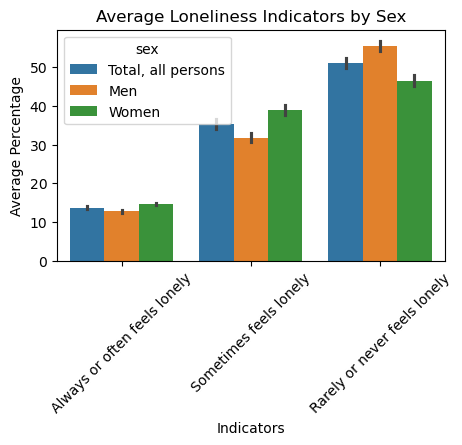

In [8]:
plt.figure(figsize=(5, 3))
sns.barplot(x='indicators', y='percent', hue='sex', data=lonley_cleaned)
plt.title('Average Loneliness Indicators by Sex')
plt.xlabel('Indicators')
plt.ylabel('Average Percentage')
plt.xticks(rotation=45)
plt.show()

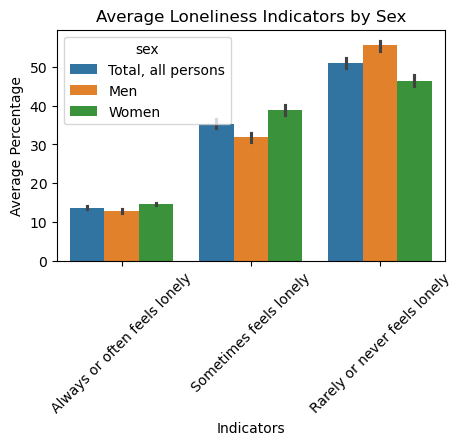

In [9]:
plt.figure(figsize=(5, 3))
sns.barplot(x='indicators', y='percent', hue='sex', data=lonley_cleaned)
plt.title('Average Loneliness Indicators by Sex')
plt.xlabel('Indicators')
plt.ylabel('Average Percentage')
plt.xticks(rotation=45)
plt.show()

It seems like compared to men, women generally report more lonliness than female. 

We can do the same for mental health indicators 

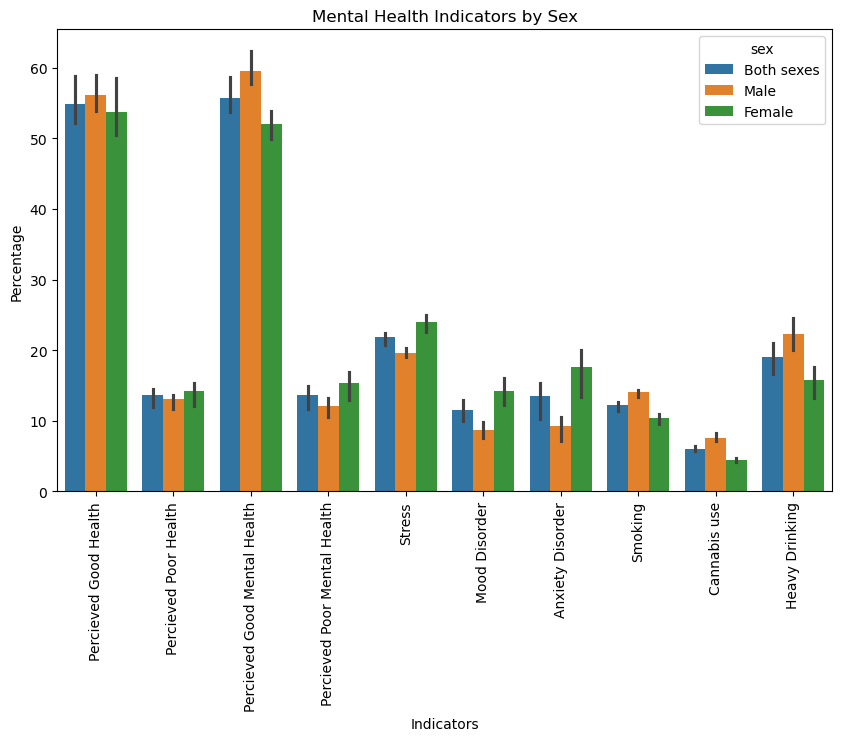

In [10]:
import textwrap
f = lambda x: textwrap.fill(x.get_text(), 10)

plt.figure(figsize=(10, 6))
sns.barplot(x='indicators', y='percent', hue='sex', data=mental_cleaned)
plt.title('Mental Health Indicators by Sex')
plt.xlabel('Indicators')
plt.ylabel('Percentage')
#plt.xticks(rotation= 'vertical', fontsize = 5)
plt.xticks([0,1,2, 3, 4,5,6,7,8,9], [r"Percieved Good Health", r"Percieved Poor Health", r"Percieved Good Mental Health", r"Percieved Poor Mental Health", r"Stress", r"Mood Disorder", r"Anxiety Disorder", r"Smoking", r"Cannabis use", r"Heavy Drinking"], rotation = 'vertical' )
plt.show()

comments on male vs female mental health and drinking indicators

Now lets find **lonliness** over years 

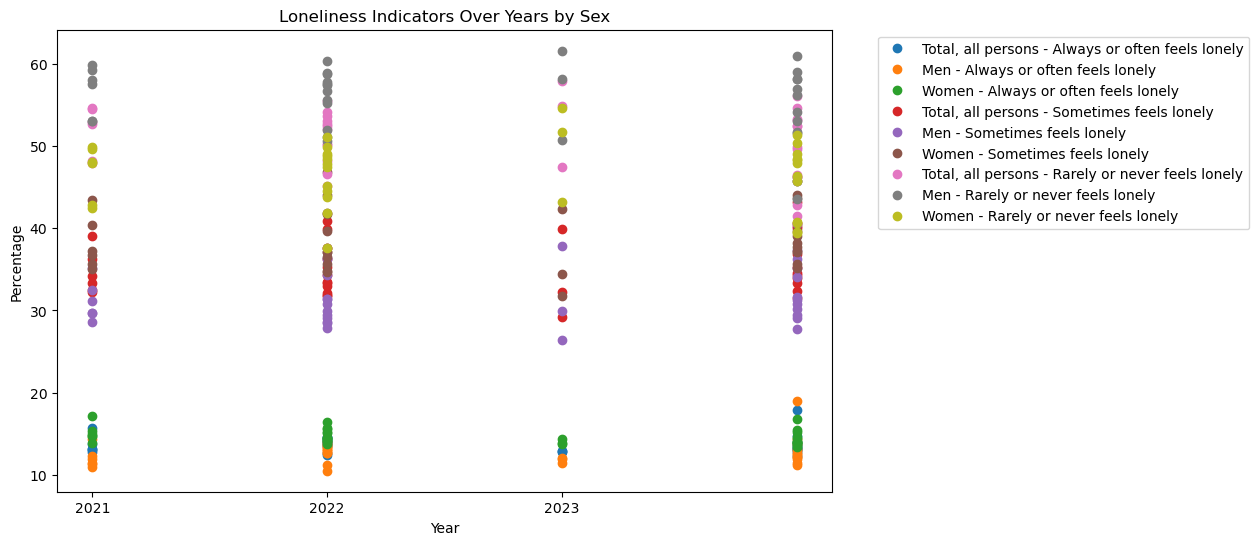

In [11]:
unique_years = [2021, 2022, 2023]
plt.figure(figsize=(10,6))
for indicator in lonley_cleaned['indicators'].unique():
    for sex in lonley_cleaned['sex'].unique():
        subset = lonley_cleaned[(lonley_cleaned['indicators'] == indicator) & (lonley_cleaned['sex'] == sex)]
        plt.plot(subset['year'], subset['percent'], label=f'{sex} - {indicator}', ls='', marker='o')
plt.title('Loneliness Indicators Over Years by Sex')
plt.xlabel('Year')
plt.xticks(unique_years)
plt.ylabel('Percentage')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Due to our number of variables, we have a considerable amount of overlap. Lets seperate variables, and because we have overlap we do a heat map for all three variables

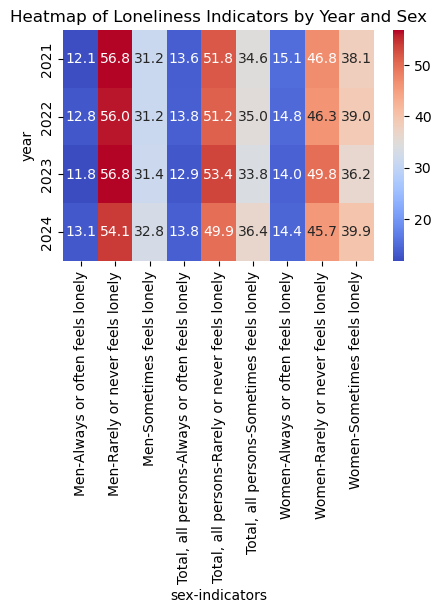

In [12]:
pivot_table = lonley_cleaned.pivot_table(index='year', columns=['sex', 'indicators'], values='percent')
plt.figure(figsize=(5, 3))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt='.1f')
plt.title('Heatmap of Loneliness Indicators by Year and Sex')
plt.show()

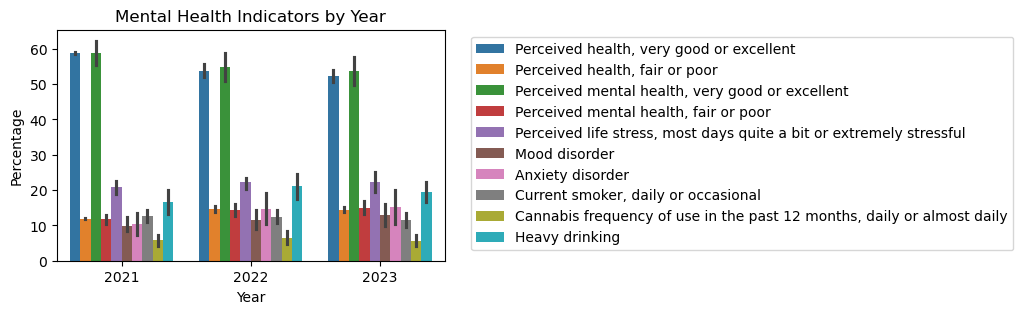

In [13]:
plt.figure(figsize=(5, 3))
sns.barplot(x='year', y='percent', hue='indicators', data=mental_cleaned, palette='tab10')
plt.title('Mental Health Indicators by Year')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

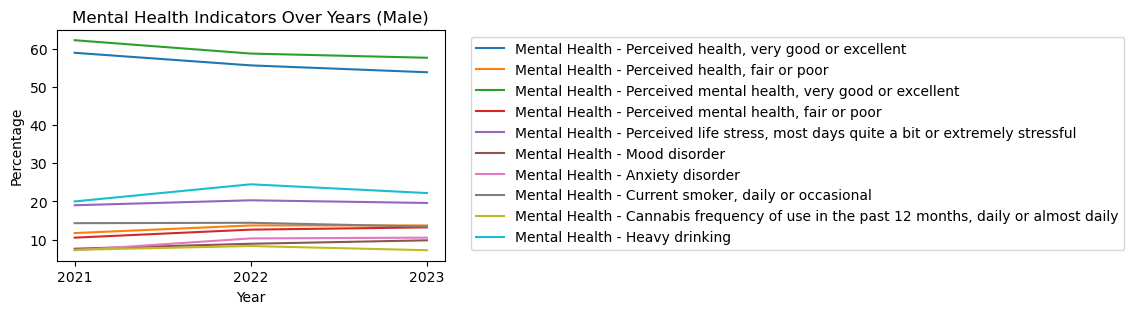

In [14]:
selected_gender = 'Male'
plt.figure(figsize=(5, 3))
for indicator in mental_cleaned['indicators'].unique():
    subset = mental_cleaned[(mental_cleaned['indicators'] == indicator) & (mental_cleaned['sex'] == selected_gender)]
    plt.plot(subset['year'], subset['percent'], label=f'Mental Health - {indicator}', linestyle='-')
plt.title('Mental Health Indicators Over Years (Male)')
plt.xlabel('Year')
plt.xticks(unique_years)
plt.ylabel('Percentage')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

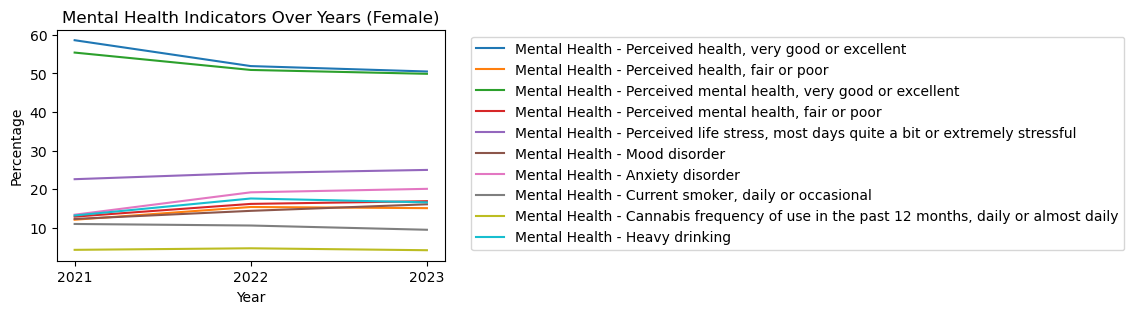

In [15]:
selected_gender = 'Female'
plt.figure(figsize=(5, 3))
for indicator in mental_cleaned['indicators'].unique():
    subset = mental_cleaned[(mental_cleaned['indicators'] == indicator) & (mental_cleaned['sex'] == selected_gender)]
    plt.plot(subset['year'], subset['percent'], label=f'Mental Health - {indicator}', linestyle='-')
plt.title('Mental Health Indicators Over Years (Female)')
plt.xlabel('Year')
plt.xticks(unique_years)
plt.ylabel('Percentage')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Lets see how these indicators between male and female compare for both our **lonliness data** and **mental heath data**

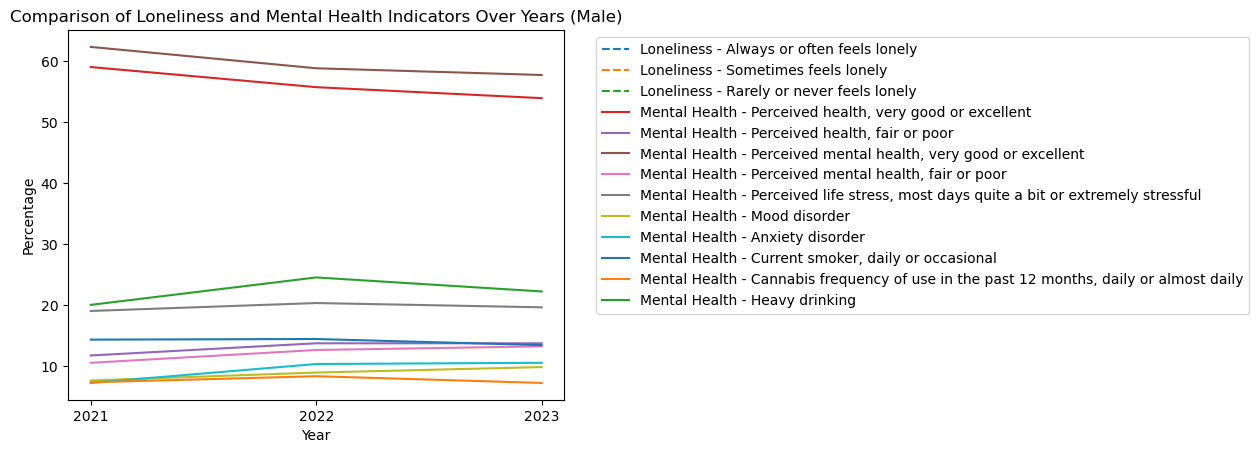

In [16]:
selected_gender = 'Male'
unique_years = [2021, 2022, 2023]
for indicator in lonley_cleaned['indicators'].unique():
    subset = lonley_cleaned[(lonley_cleaned['indicators'] == indicator) & (lonley_cleaned['sex'] == selected_gender)]
    plt.plot(subset['year'], subset['percent'], label=f'Loneliness - {indicator}', linestyle='--')

for indicator in mental_cleaned['indicators'].unique():
    subset = mental_cleaned[(mental_cleaned['indicators'] == indicator) & (mental_cleaned['sex'] == selected_gender)]
    plt.plot(subset['year'], subset['percent'], label=f'Mental Health - {indicator}', linestyle='-')

plt.title(f'Comparison of Loneliness and Mental Health Indicators Over Years ({selected_gender})')
plt.xlabel('Year')
plt.xticks(unique_years)
plt.ylabel('Percentage')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

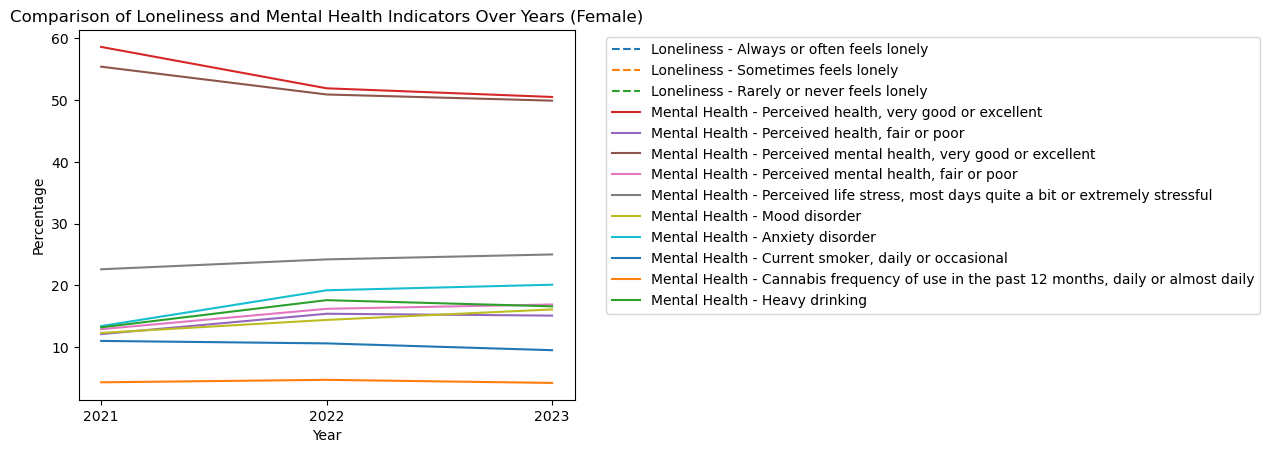

In [17]:
selected_gender = 'Female'
unique_years = [2021, 2022, 2023]
for indicator in lonley_cleaned['indicators'].unique():
    subset = lonley_cleaned[(lonley_cleaned['indicators'] == indicator) & (lonley_cleaned['sex'] == selected_gender)]
    plt.plot(subset['year'], subset['percent'], label=f'Loneliness - {indicator}', linestyle='--')

for indicator in mental_cleaned['indicators'].unique():
    subset = mental_cleaned[(mental_cleaned['indicators'] == indicator) & (mental_cleaned['sex'] == selected_gender)]
    plt.plot(subset['year'], subset['percent'], label=f'Mental Health - {indicator}', linestyle='-')

plt.title(f'Comparison of Loneliness and Mental Health Indicators Over Years ({selected_gender})')
plt.xlabel('Year')
plt.xticks(unique_years)
plt.ylabel('Percentage')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

This is our main EDA plot for *female* loneliness and mental health indicators. We see this and that 

## 5: How does our EDA change how we will handle our data

From our EDA above for both male and female, 

In [18]:
#plt.figure(figsize=(5, 3))
#sns.barplot(x='year', y='percent', hue='indicators', data=lonley_cleaned)
#plt.title('Loneliness Indicators by Year and Sex')
#plt.xlabel('Year')
#plt.ylabel('Percentage')
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
#plt.show()

## Building our SQL Script

In [19]:
def print_insert_statements(csv_file_path, table_name):
    """
    Reads a CSV file and prints an SQL INSERT statement for each row.

    The CSV file is expected to have the first row as the header.

    Args:
      csv_file_path (str): Path to the CSV file.
      table_name (str): Name of the SQL table.
    """
    with open(csv_file_path, mode='r', newline='', encoding='utf-8') as csvfile:
        reader = csv.reader(csvfile)
        headers = next(reader)  # First row is the header with column names
        columns_str = ", ".join(headers)

        for row in reader:
            # Escape single quotes in each value
            escaped_values = [value.replace("'", "''") for value in row]
            # Surround each value with single quotes
            values_str = ", ".join(f"'{val}'" for val in escaped_values)
            # Build the SQL INSERT statement
            statement = f"INSERT INTO {table_name} ({columns_str}) VALUES ({values_str});"
            print(statement)

print_insert_statements('lonliness_cleaned.csv', 'lonliness')
print_insert_statements('mental_clean.csv', 'mental')

INSERT INTO lonliness (year, sex, indicators, sociodemographic characteristics, percent) VALUES ('2021', 'Total, all persons', 'Always or often feels lonely', 'Total, 15 years and over', '13.0');
INSERT INTO lonliness (year, sex, indicators, sociodemographic characteristics, percent) VALUES ('2021', 'Total, all persons', 'Sometimes feels lonely', 'Total, 15 years and over', '34.2');
INSERT INTO lonliness (year, sex, indicators, sociodemographic characteristics, percent) VALUES ('2021', 'Total, all persons', 'Rarely or never feels lonely', 'Total, 15 years and over', '52.7');
INSERT INTO lonliness (year, sex, indicators, sociodemographic characteristics, percent) VALUES ('2021', 'Total, all persons', 'Always or often feels lonely', 'Visible minority population', '12.8');
INSERT INTO lonliness (year, sex, indicators, sociodemographic characteristics, percent) VALUES ('2021', 'Total, all persons', 'Sometimes feels lonely', 'Visible minority population', '39.1');
INSERT INTO lonliness (yea

## Database Schema 